<a href="https://colab.research.google.com/github/dangtrantrung/-Geospatial-Analysis-course/blob/master/Exercise_Proximity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'geospatial-learn-course-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F348259%2F695175%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T043732Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ac9f887c7926da31aac2ff6f5cb525f644c4ba36e3bd4c066fb0ed43d0a4dec466decf320afec725b8a35d15f68ef07b5d454135b60505c26e5e0cb1de1ed9680bdbbf92602106062019e3162ae11422f827617b75b510d570b9475055cbf4db1216e5ae0a3ee9f7b318fa925a63cad0492e8329c75c94ff0fc76e7c2805df8c82aed8cfbb996572688a013c9d0a87a16c95a34eaabfdf1ec200222ea12d69c453bb64182413c4a5096713645c00022d06662f7592006bd2382623a3bf3ba18c337b9502900675dc68502ebaf48d0560a57bbb4f0fbed7ffb5c416ea1b7004b171142101f0b7b0cb975c2c578e07ef6836b5cc67e4acb127c078a4dcb41d156,data-for-datavis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F116573%2F3551030%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T043732Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D02cc8fc9ee982d4ee9cceb7625344d5fc11754e0cdd106d7661ffa18206f3fa0425442caf2518073f69ccd6c3dbba2a59d48ee5031a0ba0ee8bf064de8906912fbbcbc094f89b4f3d8ab279ba68eb0d09f8a518bfdd5e1980e7fe90a7496323536cfe14dc5f06beebc9b14c4aff1bb5cd9b790c94b56cd1b41b7f39621a999ee8bd1fa913929ccb77f0e2563be58fc31a471e96af1f953ff8dd1808ef290fca1d0c47d2963db13ca7b420aeae581740213586fbfb0efc3791def5ce2a19fca5b183a480bf7cc71eaa7c00bc51a639831d0898167d683feda2d85f45ae9011ddb7994d85d23b4fb9e166d853fd26d989dffb2678f17ea06af445adb42f412c907'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 244538909 bytes downloaded
Downloaded and uncompressed: geospatial-learn-course-data
[==================================================] 145429 bytes downloaded
Downloaded and uncompressed: data-for-datavis
Data source import complete.


**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/proximity-analysis).**

---


# Introduction

You are part of a crisis response team, and you want to identify how hospitals have been responding to crash collisions in New York City.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/wamd0n7.png" width="450"><br/>
</center>

Before you get started, run the code cell below to set everything up.

In [20]:
!pip install -U -t /kaggle/working/ git+https://github.com/Kaggle/learntools.git@fix-correct-message

  Cloning https://github.com/Kaggle/learntools.git (to revision fix-correct-message) to /tmp/pip-req-build-tcmym9r8
  Running command git clone --filter=blob:none --quiet https://github.com/Kaggle/learntools.git /tmp/pip-req-build-tcmym9r8
  Running command git checkout -q fix-correct-message
  error: pathspec 'fix-correct-message' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  × git checkout -q fix-correct-message did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git checkout -q fix-correct-message did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [21]:
!pip install git+https://github.com/kaggle/learntools.git

  Cloning https://github.com/kaggle/learntools.git to /tmp/pip-req-build-g1ms42dc
  Running command git clone --filter=blob:none --quiet https://github.com/kaggle/learntools.git /tmp/pip-req-build-g1ms42dc
  Resolved https://github.com/kaggle/learntools.git to commit 183cdad0530e7c898cd4658a63b579c54e91f056
  Preparing metadata (setup.py) ... done


In [22]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon

import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex5 import *

You'll use the `embed_map()` function to visualize your maps.

In [23]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# Exercises

### 1) Visualize the collision data.

Run the code cell below to load a GeoDataFrame `collisions` tracking major motor vehicle collisions in 2013-2018.

In [24]:
collisions = gpd.read_file("../input/geospatial-learn-course-data/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions.shp")
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET,CROSS STRE,OFF STREET,...,CONTRIBU_2,CONTRIBU_3,CONTRIBU_4,UNIQUE KEY,VEHICLE TY,VEHICLE _1,VEHICLE _2,VEHICLE _3,VEHICLE _4,geometry
0,07/30/2019,0:00,BRONX,10464,40.841100,-73.784960,"(40.8411, -73.78496)",None,None,121 PILOT STREET,...,Unspecified,None,None,4180045,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,POINT (1043750.211 245785.815)
1,07/30/2019,0:10,QUEENS,11423,40.710827,-73.770660,"(40.710827, -73.77066)",JAMAICA AVENUE,188 STREET,None,...,None,None,None,4180007,Sedan,Sedan,None,None,None,POINT (1047831.185 198333.171)
2,07/30/2019,0:25,None,None,40.880318,-73.841286,"(40.880318, -73.841286)",BOSTON ROAD,None,None,...,None,None,None,4179575,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (1028139.293 260041.178)
3,07/30/2019,0:35,MANHATTAN,10036,40.756744,-73.984590,"(40.756744, -73.98459)",None,None,155 WEST 44 STREET,...,None,None,None,4179544,Box Truck,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (988519.261 214979.320)
4,07/30/2019,10:00,BROOKLYN,11223,40.600090,-73.965910,"(40.60009, -73.96591)",AVENUE T,OCEAN PARKWAY,None,...,None,None,None,4180660,Station Wagon/Sport Utility Vehicle,Bike,None,None,None,POINT (993716.669 157907.212)


Use the "LATITUDE" and "LONGITUDE" columns to create an interactive map to visualize the collision data.  What type of map do you think is most effective?

In [25]:
m_1 = folium.Map(location=[40.7, -74], zoom_start=11)

# Your code here: Visualize the collision data
for idx, row in collisions.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m_1)

# Uncomment to see a hint
#q_1.hint()

# Show the map
embed_map(m_1, "q_1.html")

In [26]:
# Get credit for your work after you have created a map
q_1.check()

# Uncomment to see our solution (your code may look different!)
#q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 2) Understand hospital coverage.

Run the next code cell to load the hospital data.

In [27]:
hospitals = gpd.read_file("../input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shp")
hospitals.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,latitude,longitude,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,40.843490,-73.911010,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,40.831429,-73.903178,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,40.848060,-73.843656,POINT (1027505.000 248287.000)
3,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,40.855687,-73.845311,POINT (1027042.000 251065.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,40.816758,-73.924478,POINT (1005154.000 236853.000)


Use the "latitude" and "longitude" columns to visualize the hospital locations.

In [28]:
m_2 = folium.Map(location=[40.7, -74], zoom_start=11)

# Your code here: Visualize the hospital locations
for idx, row in hospitals.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Uncomment to see a hint
#q_2.hint()

# Show the map
embed_map(m_2, "q_2.html")

In [29]:
# Get credit for your work after you have created a map
q_2.check()

# Uncomment to see our solution (your code may look different!)
#q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 3) When was the closest hospital more than 10 kilometers away?

Create a DataFrame `outside_range` containing all rows from `collisions` with crashes that occurred more than 10 kilometers from the closest hospital.

Note that both `hospitals` and `collisions` have EPSG 2263 as the coordinate reference system, and EPSG 2263 has units of meters.

In [30]:
buffer = hospitals.geometry.buffer(10000)
buffer.head()

0    POLYGON ((1018872.000 246596.000, 1018823.847 ...
1    POLYGON ((1021044.000 242204.000, 1020995.847 ...
2    POLYGON ((1037505.000 248287.000, 1037456.847 ...
3    POLYGON ((1037042.000 251065.000, 1036993.847 ...
4    POLYGON ((1015154.000 236853.000, 1015105.847 ...
dtype: geometry

In [42]:
from folium import  GeoJson
from folium.plugins import HeatMap
# Create map with collisions and hospitals
m = folium.Map(location=[40.7, -74], zoom_start=11)
HeatMap(data=hospitals[['latitude', 'longitude']], radius=10).add_to(m)
for idx, row in collisions.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m)

# Plot each polygon on the map
GeoJson(buffer.to_crs(epsg=2263)).add_to(m)

# Show the map
embed_map(m, "q_3.html")

In [31]:
# Your code here
my_union = buffer.geometry.unary_union
print('Type:', type(my_union))
collisions['Results'] = ['True' if my_union.contains(geo) else 'Fail' for geo in collisions['geometry']]
outside_range = collisions[collisions['Results']=='Fail'].drop(['Results'],axis=1)

# Check your answer
q_3.check()

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [32]:
outside_range.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 39595 entries, 0 to 261900
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DATE        39595 non-null  object  
 1   TIME        39595 non-null  object  
 2   BOROUGH     25898 non-null  object  
 3   ZIP CODE    25891 non-null  object  
 4   LATITUDE    39595 non-null  float64 
 5   LONGITUDE   39595 non-null  float64 
 6   LOCATION    39595 non-null  object  
 7   ON STREET   33001 non-null  object  
 8   CROSS STRE  25642 non-null  object  
 9   OFF STREET  2936 non-null   object  
 10  NUMBER OF   39595 non-null  float64 
 11  NUMBER O_1  39593 non-null  float64 
 12  NUMBER O_2  39595 non-null  int64   
 13  NUMBER O_3  39595 non-null  int64   
 14  NUMBER O_4  39595 non-null  int64   
 15  NUMBER O_5  39595 non-null  int64   
 16  NUMBER O_6  39595 non-null  int64   
 17  NUMBER O_7  39595 non-null  int64   
 18  CONTRIBUTI  39427 non-null  object  


In [33]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

The next code cell calculates the percentage of collisions that occurred more than 10 kilometers away from the closest hospital.

In [34]:
percentage = round(100*len(outside_range)/len(collisions), 2)
print("Percentage of collisions more than 10 km away from the closest hospital: {}%".format(percentage))

Percentage of collisions more than 10 km away from the closest hospital: 15.12%


### 4) Make a recommender.

When collisions occur in distant locations, it becomes even more vital that injured persons are transported to the nearest available hospital.

With this in mind, you decide to create a recommender that:
- takes the location of the crash (in EPSG 2263) as input,
- finds the closest hospital (where distance calculations are done in EPSG 2263), and
- returns the name of the closest hospital.

In [35]:
def best_hospital(collision_location):
    # Your code here
    distances = hospitals.geometry.distance(collision_location)
    name = hospitals.iloc[distances.idxmin()]["name"]
    return name

# Test your function: this should suggest CALVARY HOSPITAL INC
print(best_hospital(outside_range.geometry.iloc[0]))

# Check your answer
q_4.check()

CALVARY HOSPITAL INC


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [36]:
# Lines below will give you a hint or solution code
#q_4.hint()
#q_4.solution()

### 5) Which hospital is under the highest demand?

Considering only collisions in the `outside_range` DataFrame, which hospital is most recommended?  

Your answer should be a Python string that exactly matches the name of the hospital returned by the function you created in **4)**.

In [37]:
# Your code here
best_hospitals=[best_hospital(geo) for geo in outside_range.geometry]
highest_demand = max(best_hospitals,key=best_hospitals.count)

# Check your answer
q_5.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [38]:
# Lines below will give you a hint or solution code
q_5.hint()
#q_5.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by applying the `best_hospital()` function to every entry in `outside_range.geometry`.

### 6) Where should the city construct new hospitals?

Run the next code cell (without changes) to visualize hospital locations, in addition to collisions that occurred more than 10 kilometers away from the closest hospital.

In [39]:
m_6 = folium.Map(location=[40.7, -74], zoom_start=11)

coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(10000)
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m_6)
HeatMap(data=outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m_6)
folium.LatLngPopup().add_to(m_6)

embed_map(m_6, 'm_6.html')

Click anywhere on the map to see a pop-up with the corresponding location in latitude and longitude.

The city of New York reaches out to you for help with deciding locations for two brand new hospitals.  They specifically want your help with identifying locations to bring the calculated percentage from step **3)** to less than ten percent.  Using the map (and without worrying about zoning laws or what potential buildings would have to be removed in order to build the hospitals), can you identify two locations that would help the city accomplish this goal?  

Put the proposed latitude and longitude for hospital 1 in `lat_1` and `long_1`, respectively.  (Likewise for hospital 2.)

Then, run the rest of the cell as-is to see the effect of the new hospitals.  Your answer will be marked correct, if the two new hospitals bring the percentage to less than ten percent.

In [48]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import numpy



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40.41756844009682 40.41395752977488
-73.7012067628147 -73.65517313734796


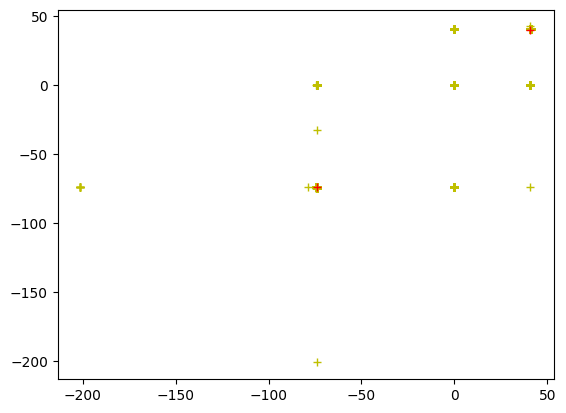

In [74]:
X=outside_range['LATITUDE']
Y=outside_range['LONGITUDE']
COORDS=[X,Y]
COORDS=numpy.array(COORDS).reshape(len(X),2)

#print(COORDS)
kmeans = KMeans(n_clusters=2, random_state=0).fit(COORDS)
for point in COORDS:
   plt.plot(point[0],point[1],'y+')
for center in kmeans.cluster_centers_:
   plt.plot(center[0],center[1],'r+')
   print(center[0],center[1])

In [63]:
outside_range.info()
len(COORDS)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 39595 entries, 0 to 261900
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DATE        39595 non-null  object  
 1   TIME        39595 non-null  object  
 2   BOROUGH     25898 non-null  object  
 3   ZIP CODE    25891 non-null  object  
 4   LATITUDE    39595 non-null  float64 
 5   LONGITUDE   39595 non-null  float64 
 6   LOCATION    39595 non-null  object  
 7   ON STREET   33001 non-null  object  
 8   CROSS STRE  25642 non-null  object  
 9   OFF STREET  2936 non-null   object  
 10  NUMBER OF   39595 non-null  float64 
 11  NUMBER O_1  39593 non-null  float64 
 12  NUMBER O_2  39595 non-null  int64   
 13  NUMBER O_3  39595 non-null  int64   
 14  NUMBER O_4  39595 non-null  int64   
 15  NUMBER O_5  39595 non-null  int64   
 16  NUMBER O_6  39595 non-null  int64   
 17  NUMBER O_7  39595 non-null  int64   
 18  CONTRIBUTI  39427 non-null  object  


39595

In [75]:
# Your answer here: proposed location of hospital 1
lat_1 = kmeans.cluster_centers_[0][0]
long_1 =   kmeans.cluster_centers_[0][1]

# Your answer here: proposed location of hospital 2
lat_2 =  kmeans.cluster_centers_[1][0]
long_2 = kmeans.cluster_centers_[1][1]


# Do not modify the code below this line
try:
    new_df = pd.DataFrame(
        {'Latitude': [lat_1, lat_2],
         'Longitude': [long_1, long_2]})
    new_gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Longitude, new_df.Latitude))
    new_gdf.crs = {'init' :'epsg:4326'}
    new_gdf = new_gdf.to_crs(epsg=2263)
    # get new percentage
    new_coverage = gpd.GeoDataFrame(geometry=new_gdf.geometry).buffer(10000)
    new_my_union = new_coverage.geometry.unary_union
    new_outside_range = outside_range.loc[~outside_range["geometry"].apply(lambda x: new_my_union.contains(x))]
    new_percentage = round(100*len(new_outside_range)/len(collisions), 2)
    print("(NEW) Percentage of collisions more than 10 km away from the closest hospital: {}%".format(new_percentage))
    # Did you help the city to meet its goal?
    q_6.check()
    # make the map
    m = folium.Map(location=[40.7, -74], zoom_start=11)
    folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)
    folium.GeoJson(new_coverage.geometry.to_crs(epsg=4326)).add_to(m)
    for idx, row in new_gdf.iterrows():
        Marker([row['Latitude'], row['Longitude']]).add_to(m)
    HeatMap(data=new_outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m)
    folium.LatLngPopup().add_to(m)
    display(embed_map(m, 'q_6.html'))
except:
    q_6.hint()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(NEW) Percentage of collisions more than 10 km away from the closest hospital: 15.12%


<IPython.core.display.Javascript object>

<span style="color:#cc3333">Incorrect:</span> Your answer will be marked correct, once you choose two hospital locations that bring the percentage from step 3 below 10%. Unfortunately, your calculated percentage is currently 15.12%. Please use the map to find two new hospital locations.

In [41]:
# Uncomment to see one potential answer
#q_6.solution()

# Congratulations!

You have just completed the Geospatial Analysis micro-course!  Great job!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*